In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

# Data Exploration

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Checking missing data
* Why does rating have so many missing records?
* Fix records that can be fix, else drop

In [6]:
null_records = dict(df.isnull().sum())
for a in null_records:
    if null_records[a] > 0 :
        print(a,':',null_records[a])

Rating : 1474
Type : 1
Content Rating : 1
Current Ver : 8
Android Ver : 3


In [7]:
#look at the records where ratings is not available
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [8]:
#this app has no type and no ratings, drop this record
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [9]:
#drop index loc 9148
df.drop(index = 9148,inplace = True)

In [10]:
#This app has the values shifted to the right one, from the category. The category is NA/Genres is NaN.
#From the app name, this looks to be in the TOOLS category/genre
df[df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#drop index loc 10472
df.drop(index = 10472,inplace = True)

In [12]:
#reset index
df.reset_index(drop = True,inplace = True)

### Check to see why ratings has so many missing values
* Minimum rating is 1.0, you cant give a rating of 0
* Change reviews column from object to int
* Check if NaN Ratings is because Reviews is so low
* Ratings is null because the # of reviews are low. The missing value is MAR.
* Create new column that indicates the application has no ratings

In [13]:
#change reviews into int
df['Reviews'] = df['Reviews'].astype(int)

In [14]:
#no apps had less than 1 ratings
df[df['Rating'] < 1.1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
6490,MbH BM,MEDICAL,1.0,1,2.3M,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6M,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up


In [15]:
ratings_missing = df[df['Rating'].isna()]

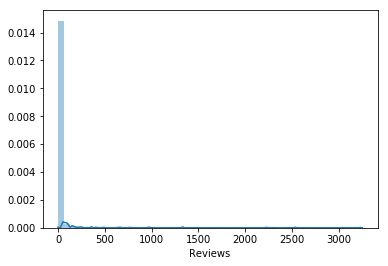

In [16]:
sns.distplot(ratings_missing['Reviews'])

In [17]:
ratings_missing['Reviews'].describe()

count    1473.000000
mean       18.074678
std       139.958995
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max      3248.000000
Name: Reviews, dtype: float64

In [18]:
ratings_missing[ratings_missing['Reviews'] > 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,NaN,1330,22M,"50,000+",Free,0,Everyone,Comics,"July 3, 2018",6.1.1,4.2 and up


In [19]:
#most ratings are null because the number of reviews are low
pd.cut(ratings_missing['Reviews'],bins=[-1,20,np.inf]).value_counts()

(-1.0, 20.0]    1330
(20.0, inf]      143
Name: Reviews, dtype: int64

In [20]:
#create new column that indicates there are no ratings
df['Missing_Ratings'] = df['Rating'].isnull()

### Drop Duplicate Records
* Do the the dynamic nature of the web scraping, some records were duplicated
* 10841 original, to 10358 after dropped, a total of 483 records were duplicated

In [21]:
#some apps were duplicated in the data source
df.iloc[[663,518,554]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Missing_Ratings
663,Just She - Top Lesbian Dating,DATING,1.9,954,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,False
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,False
554,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,False


In [22]:
#drop duplicated records
df.drop_duplicates(inplace = True)

In [23]:
#10841 records in original, now only 10358
df.shape

(10356, 14)

In [24]:
df[df['App'] == 'Minecraft']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Missing_Ratings
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,False
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,False


In [25]:
#some are still duplicated, so drop duplicates if app name is the same
df.drop_duplicates(subset='App',inplace = True)

In [26]:
df.shape

(9658, 14)

### Clean Application Size
* Size should be numbers not string.
* Convert the size column to int by removing the letters after every number
* Some apps are made in two platforms indicated by "Varies with device"
* Create new column that indicates the application has multiple platforms

In [27]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [28]:
#some sizes dont have numerical values
df[df['Size'] == 'Varies with device'].shape

(1226, 14)

In [29]:
size_app = df['Size'].str.extract('([.\d]+)(\w+)')

In [30]:
size_app.head()

,0,1
0,19,M
1,14,M
2,8.7,M
3,25,M
4,2.8,M


In [31]:
#convert the first column into a float
size_app[0] = size_app[0].astype('float')

In [32]:
#if the size ends with K divide the value by 1000 inorder to change it to megabytes
#fi size does not end with K leave as is
size_app[0] = np.where(size_app[1] == 'k',size_app[0]/1000,size_app[0])

In [33]:
#round to 2 decimal places
size_app[0]= round(size_app[0],2)

In [34]:
#replace the original size column to size_app[0]
df['Size'] = size_app[0]

In [35]:
#some apps had multiple 'sizes' indicating that it was a cross platform application
size_app[0].isnull().sum()

1226

### Clean Installs column 
* Remove the ',' and '+'
* Change the type from object to int

In [36]:
df['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [37]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','')

In [38]:
df['Installs'] = df['Installs'].astype('int')

### Clean Type Column
* Nothing to clean

In [39]:
df['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

### Clean Price Column
* Price should be numeric but this column is not
* Change the column to numeric

In [40]:
#most are 0 as expected, however, the rest have dollar signs
df['Price'].value_counts().head()

0        8902
$0.99     145
$2.99     124
$1.99      73
$4.99      70
Name: Price, dtype: int64

In [41]:
#remove the dollar signs from the Price column
df['Price'] = df['Price'].str.replace('$','')

In [42]:
#change to floating type
df['Price'] = df['Price'].astype('float')

### Clean Content Rating
* See the distribution of records of application contents
* Change the Unrated Content to Everyone
* Change Everyone 10+ to Everyone
* Change Adults only 18+ to Mature 17+

In [43]:
df['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [44]:
#This app seems to be for Everyone
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Missing_Ratings
7312,Best CG Photography,FAMILY,NaN,1,2.5,500,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up,True
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,False


In [45]:
#Upon inspection Everyone 10+ can be for Everyone also
df[df['Content Rating'] == 'Everyone 10+'];

In [46]:
to_replace = {'Everyone 10+':'Everyone', 'Adults only 18+':'Mature 17+', 'Unrated':'Everyone'}

In [47]:
#replace the contents with the specified items in the dictionary
df['Content Rating'].replace(to_replace,inplace = True)

In [48]:
#check to see if it was replaced
df['Content Rating'].value_counts()

Everyone      8226
Teen          1036
Mature 17+     396
Name: Content Rating, dtype: int64

In [49]:
df['Category'].value_counts()

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [50]:
df['Genres'].str.split(';',expand = True)[1].value_counts()

Education             98
Action & Adventure    98
Pretend Play          69
Brain Games           64
Creativity            33
Music & Video         31
Name: 1, dtype: int64

In [51]:
df[df['Category'] == 'FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Missing_Ratings
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19.00,1000000,Free,0.00,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up,False
2018,Coloring & Learn,FAMILY,4.4,12753,51.00,5000000,Free,0.00,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up,False
2019,Mahjong,FAMILY,4.5,33983,22.00,5000000,Free,0.00,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up,False
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46.00,1000000,Free,0.00,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up,False
2021,Toy Pop Cubes,FAMILY,4.5,5761,21.00,1000000,Free,0.00,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up,False
2022,Educational Games 4 Kids,FAMILY,4.3,11618,39.00,5000000,Free,0.00,Everyone,Educational;Education,"April 3, 2018",2.4,4.1 and up,False
2023,Candy Pop Story,FAMILY,4.7,12948,23.00,1000000,Free,0.00,Everyone,Casual;Brain Games,"May 24, 2018",2.0.3165,2.3 and up,False
2027,Candy Smash,FAMILY,4.5,11436,15.00,1000000,Free,0.00,Everyone,Casual;Brain Games,"April 17, 2018",2.2.3169,4.0.3 and up,False
2028,Happy Fruits Bomb - Cube Blast,FAMILY,4.5,2150,20.00,500000,Free,0.00,Everyone,Casual;Brain Games,"February 1, 2018",1.0.3122,4.0.3 and up,False
2030,Princess Adventures Puzzles,FAMILY,4.4,382,44.00,500000,Free,0.00,Everyone,Education;Creativity,"August 1, 2018",1.1.0,2.3 and up,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10838
Data columns (total 14 columns):
App                9658 non-null object
Category           9658 non-null object
Rating             8196 non-null float64
Reviews            9658 non-null int32
Size               8432 non-null float64
Installs           9658 non-null int32
Type               9658 non-null object
Price              9658 non-null float64
Content Rating     9658 non-null object
Genres             9658 non-null object
Last Updated       9658 non-null object
Current Ver        9650 non-null object
Android Ver        9656 non-null object
Missing_Ratings    9658 non-null bool
dtypes: bool(1), float64(3), int32(2), object(8)
memory usage: 990.3+ KB


In [53]:
df.isnull().sum()

App                   0
Category              0
Rating             1462
Reviews               0
Size               1226
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Missing_Ratings       0
dtype: int64

In [55]:
df.to_csv('google_play_store_cleaned(1).csv',index = False)